# 朴素贝叶斯

## 【关键词】

- 朴素：独立性假设
- 贝叶斯公式

优点：
- 朴素贝叶斯模型发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率；
- 对小规模的数据表现很好；
- 能处理多分类任务，适合增量式训练；
- 对缺失数据不太敏感，算法也比较简单，常用于文本分类

缺点：
- 只能用于分类问题
- 需要计算先验概率；
- 分类决策存在错误率；
- 对输入数据的表达形式很敏感

## 一、朴素贝叶斯原理

朴素贝叶斯算法是一个典型的统计学习方法，主要理论基础就是一个贝叶斯公式，贝叶斯公式的基本定义如下：

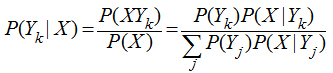

这个公式虽然看上去简单，但它却能总结历史，预知未来：
- 公式的右边是总结历史
- 公式的左边是预知未来

如果把Y看成类别，X看成特征，P(Yk|X)就是在已知特征X的情况下求Yk类别的概率，而对P(Yk|X)的计算又全部转化到类别Yk的特征分布上来。

举个例子，大学的时候，某男生经常去图书室晚自习，发现他喜欢的那个女生也常去那个自习室，心中窃喜，于是每天买点好吃点在那个自习室蹲点等她来，可是人家女生不一定每天都来，眼看天气渐渐炎热，图书馆又不开空调，如果那个女生没有去自修室，该男生也就不去，每次男生鼓足勇气说：“嘿，你明天还来不？”,“啊，不知道，看情况”。

然后该男生每天就把她去自习室与否以及一些其他情况做一下记录，用Y表示该女生是否去自习室，即Y={去，不去}，X是跟去自修室有关联的一系列条件，比如当天上了哪门主课，蹲点统计了一段时间后，该男生打算今天不再蹲点，而是先预测一下她会不会去，现在已经知道了今天上了常微分方法这么主课，于是计算P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大，如果P(Y=去|常微分方程) >P(Y=不去|常微分方程)，那这个男生不管多热都屁颠屁颠去自习室了，否则不就去自习室受罪了。P(Y=去|常微分方程)的计算可以转为计算以前她去的情况下，那天主课是常微分的概率P(常微分方程|Y=去)，注意公式右边的分母对每个类别（去/不去）都是一样的，所以计算的时候忽略掉分母，这样虽然得到的概率值已经不再是0~1之间，但是通过比较大小还是能选择类别。

后来他发现还有一些其他条件可以挖，比如当天星期几、当天的天气，以及上一次与她在自修室的气氛，统计了一段时间后，该男子一计算，发现不好算了，因为总结历史的公式：

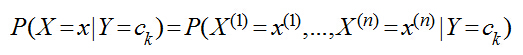

这里n=3，x(1)表示主课，x(2)表示天气，x(3)表示星期几，x(4)表示气氛，Y仍然是{去，不去}，现在主课有8门，天气有晴、雨、阴三种、气氛有A+,A,B+,B，C五种，那么总共需要估计的参数有8×3×7×5×2=1680个，每天只能收集到一条数据，那么等凑齐1680条数据，大学都毕业了，男生大呼不妙，于是做了一个独立性假设，假设这些影响她去自习室的原因是独立互不相关的，于是：

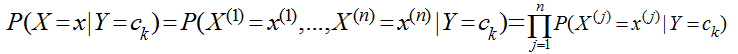

有了这个独立假设后，需要估计的参数就变为，(8+3+7+5)×2 = 46个了，而且每天收集的一条数据，可以提供4个参数，这样该男生就预测越来越准了。


朴素的概念：独立性假设，假设各个特征之间是独立不相关的。

### 朴素贝叶斯分类器

讲了上面的小故事，我们来朴素贝叶斯分类器的表示形式：

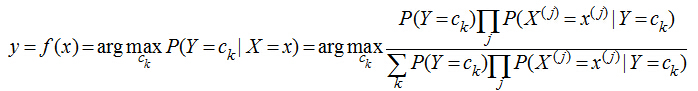

当特征为为x时，计算所有类别的条件概率，选取条件概率最大的类别作为待分类的类别。由于上公式的分母对每个类别都是一样的，因此计算时可以不考虑分母，即

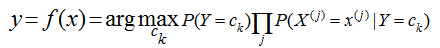

朴素贝叶斯的朴素体现在其对各个条件的独立性假设上，加上独立假设后，大大减少了参数假设空间。

### 在文本分类上的应用

文本分类的应用很多，比如垃圾邮件和垃圾短信的过滤就是一个2分类问题，新闻分类、文本情感分析等都可以看成是文本分类问题，分类问题由两步组成：训练和预测，要建立一个分类模型，至少需要有一个训练数据集。贝叶斯模型可以很自然地应用到文本分类上：现在有一篇文档d（Document），判断它属于哪个类别ck，只需要计算文档d属于哪一个类别的概率最大：

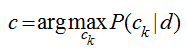

在分类问题中，我们并不是把所有的特征都用上，对一篇文档d，我们只用其中的部分特征词项t1,t2,...,tnd（nd表示d中的总词条数目），因为很多词项对分类是没有价值的，比如一些停用词“的,是,在”在每个类别中都会出现，这个词项还会模糊分类的决策面，关于特征词的选取，我的这篇文章有介绍。用特征词项表示文档后，计算文档d的类别转化为：

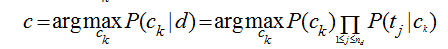

注意P(Ck|d)只是正比于后面那部分公式，完整的计算还有一个分母，但我们前面讨论了，对每个类别而已分母都是一样的，于是在我们只需要计算分子就能够进行分类了。实际的计算过程中，多个概率值P(tj|ck)的连乘很容易下溢出为0，因此转化为对数计算，连乘就变成了累加：

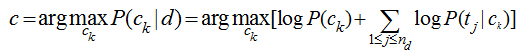

我们只需要从训练数据集中，计算每一个类别的出现概率P(ck)和每一个类别中各个特征词项的概率P(tj|ck)，而这些概率值的计算都采用最大似然估计，说到底*就是统计每个词在各个类别中出现的次数和各个类别的文档的数目*：

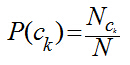
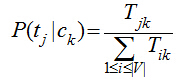

## 二、3种贝叶斯模型

In [3]:
(0.9*2/(365*20))/(3/7)*10000

5.753424657534247

In [4]:
(7/10)*(1/2)/(8/20)

0.8749999999999999

### 1、高斯分布朴素贝叶斯

高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据

In [16]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
muNB = GaussianNB()

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
target = iris.target
samples = data[:,:2]

In [19]:
muNB.fit(samples,target)

xmin,xmax = samples[:,0].min(),samples[:,0].max()
ymin,ymax = samples[:,1].min(),samples[:,1].max()

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.ravel(),yy.ravel()]

y_ = muNB.predict(X_test)

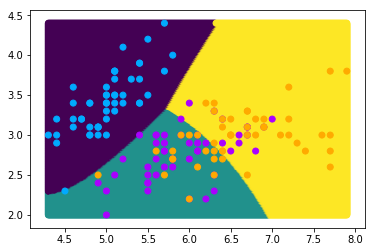

In [20]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['#00aaff','#aa00ff','#ffaa00'])

plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(samples[:,0],samples[:,1],c=target,cmap=colormap)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
logistic = LogisticRegression()
tree = DecisionTreeClassifier()

knn.fit(samples,target)
logistic.fit(samples,target)
tree.fit(samples,target)

y1_ = knn.predict(X_test)
y2_ = logistic.predict(X_test)
y3_ = tree.predict(X_test)

results = [y_,y1_,y2_,y3_]

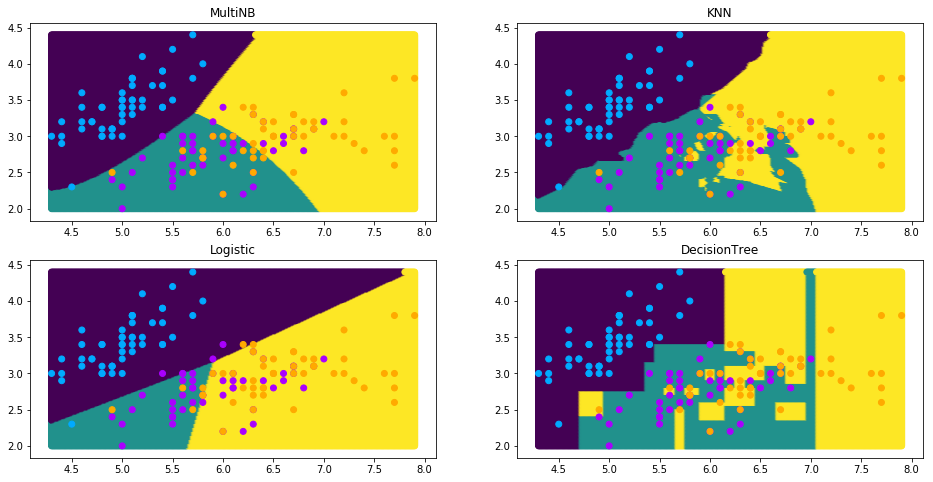

In [22]:
titles = ['MultiNB','KNN','Logistic','DecisionTree']
plt.figure(figsize=(16,8))

for i in range(4):
    axes = plt.subplot(2,2,i+1)
    axes.set_title(titles[i])
    y = results[i]
    axes.scatter(X_test[:,0],X_test[:,1],c=y)
    axes.scatter(samples[:,0],samples[:,1],c=target,cmap=colormap)

### 2、多项式分布朴素贝叶斯

多项式分布：

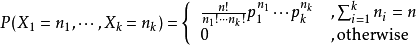

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

#### 例：延续上面，使用鸢尾花数据

In [26]:
# 处理文本分类

data = pd.read_table('../data/SMSSpamCollection',header=None)
samples = data[1]
target = data[0]

In [52]:
# 用于将文本内容转换成词频格式的类
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
# tf对象也需要进行训练
# tf_samples = tf.fit_transform(samples)
# 上面的代码可以改写成
tf.fit(samples)
# 新的数据仍需要使用训练过的tf对象进行转换
tf_sampels = tf.transform(samples)

In [34]:
tf_samples

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.naive_bayes import MultinomialNB

munb = MultinomialNB()

munb.fit(tf_samples,target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# 不能直接使用文本集进行训练
# munb.fit(samples,target)

ValueError: could not convert string to float: 'Rofl. Its true to its name'

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(tf_samples,target,test_size=0.2,random_state=1)

munb.fit(X_train,y_train)
y_ = munb.predict(X_test)

In [38]:
munb.score(X_test,y_test)

0.9641255605381166

In [49]:
test = [" £1000 or a 4* holiday (flights inc),TEL.9110098112",
"You are a winner U have been specially selected 2 receive £1000 or a 4* holiday (flights inc)"]

In [50]:
tf_test = tf.transform(test)

In [51]:
munb.predict(tf_test)

array(['spam', 'spam'], dtype='<U4')

### 3、伯努利分布朴素贝叶斯

伯努利分布：

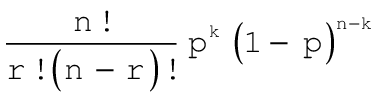

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

#### 例：继续使用鸢尾花数据集

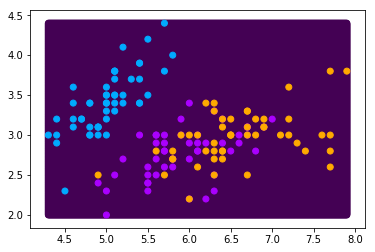

In [64]:
from sklearn.naive_bayes import BernoulliNB
iris = load_iris()
data = iris.data
target = iris.target
samples = data[:,:2]

ber = BernoulliNB()
ber.fit(samples,target)

xmin,xmax = samples[:,0].min(),samples[:,0].max()
ymin,ymax = samples[:,1].min(),samples[:,1].max()

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.ravel(),yy.ravel()]

y_ = ber.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(samples[:,0],samples[:,1],c=target,cmap=colormap)

In [59]:
# 处理文本分类
data = pd.read_table('../data/SMSSpamCollection',header=None)
train = data[1]
target = data[0]

tf = TfidfVectorizer()
tf_train = tf.fit_transform(train)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(tf_train,target,test_size=0.2,random_state=1)

In [62]:
bernuli = BernoulliNB()
bernuli.fit(X_train,y_train)
y_ = bernuli.predict(X_test)

In [63]:
bernuli.score(X_test,y_test)

0.9847533632286996

## 三、文本分类实战

对短信进行二分类，数据为SMSSpamCollection

导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]

训练数据

预测数据，使用tf.transform(['xx'])进行转换生成测试数据

## 四、作业

#### 对email进行二分类，两种邮件分别在ham和spam目录下

In [65]:
pd.read_csv('../data/email/spam/1.txt')

,--- Codeine 15mg -- 30 for $203.70 -- VISA Only!!! --
0,-- Codeine (Methylmorphine) is a narcotic (opi...
1,-- We have 15mg & 30mg pills -- 30/15mg for $2...


In [99]:
def load_message(categoray):
    samples = []
    target = []
    for i in range(1,26):
#         utf-8 gbk 加入errors可以避免错误
        with open('../data/email/%s/%d.txt'%(categoray,i),'r',errors = 'ignore') as fp:
            data = fp.read()
            samples.append(data)
            target.append(categoray)
    return (samples,target)

In [100]:
train1,target1 = load_message('spam')
train2,target2 = load_message('ham')

In [106]:
train = train1 + train2
target = target1 + target2

In [107]:
tf = TfidfVectorizer()
tf_train = tf.fit_transform(train)

In [144]:
X_train,X_test,y_train,y_test = train_test_split(tf_train,target,test_size=0.3)

In [145]:
munb = MultinomialNB()
bernb = BernoulliNB()

munb.fit(X_train,y_train)
bernb.fit(X_train,y_train)

print("MultinomialNB score is %f"%munb.score(X_test,y_test))
print("BernoulliNB score is %f"%bernb.score(X_test,y_test))

MultinomialNB score is 0.933333
BernoulliNB score is 0.933333
